In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier

from training_utils import prepare_dataset, print_metrics

random_seed = 42

In [4]:
Xtrain, ytrain, Xval, yval, sample_weight = prepare_dataset()
print(f"Training samples: {Xtrain.shape[0]}, Validation samples: {Xval.shape[0]}")

Training samples: 4976, Validation samples: 247


In [4]:
param_grid = {
    "n_estimators": range(10, 101, 20),
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
}

best_accuracy = 0
best_params = None

sample_weight = np.clip(sample_weight, 1e-6, 1.0)

for params in ParameterGrid(param_grid):
    clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=params["max_depth"]),
        random_state=random_seed,
        n_estimators=params["n_estimators"],
        learning_rate=params["learning_rate"],
    )
    clf.fit(Xtrain, ytrain, sample_weight=sample_weight)

    yval_pred = clf.predict(Xval)
    accuracy = accuracy_score(yval, yval_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best Validation Accuracy: 0.708502024291498


Accuracy: 0.708502024291498
Confusion Matrix:
[[92 29]
 [43 83]]
F1 Score: 0.6974789915966386
Best Threshold (Youden's J statistic): 0.4980364892122103


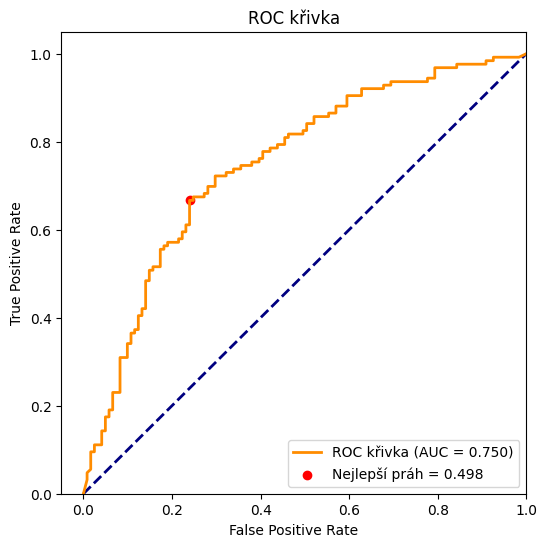

In [6]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=best_params["max_depth"]),
    random_state=random_seed,
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
)
model.fit(Xtrain, ytrain, sample_weight=sample_weight)

yval_pred = model.predict(Xval)
yval_proba = model.predict_proba(Xval)[:, 1]

print_metrics(yval, yval_pred, yval_proba)